In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.solver.kalman_filter import KFObservedData, KFSystemData, KalmanFilterPoint, rts_smoother
from src.solver.solver_field import StandardSolverField
from src.solver.memory import Memory
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

SCALE = 1
def get_kf_point(y):
    return KalmanFilterPoint(system=KFSystemData(F=np.ones((1, 1)), 
                                                 G=np.ones((1, 1)), 
                                                 Q=np.ones((1, 1))*SCALE),
                             observe=KFObservedData(H=np.ones((1, 1)),
                                                    R=np.ones((1, 1))*SCALE,
                                                    observed_y=np.array([y], dtype=np.float32))
            )


df = sns.load_dataset('flights').passengers

### 予測する対象のプロット

<AxesSubplot: >

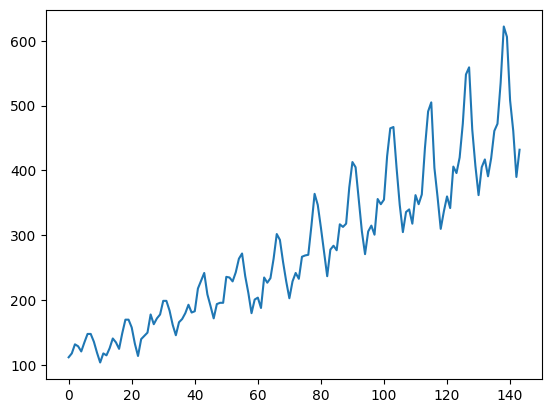

In [3]:
df.plot()

### 計算を行う

In [4]:
solver = StandardSolverField(Memory([get_kf_point(y) for y in df]))
# 予測＋フィルタリング
result = solver(dict(X=np.zeros((1, 1)), V=np.ones((1, 1))))
# RTS平滑化
smoothed_result = rts_smoother(solver.memory)

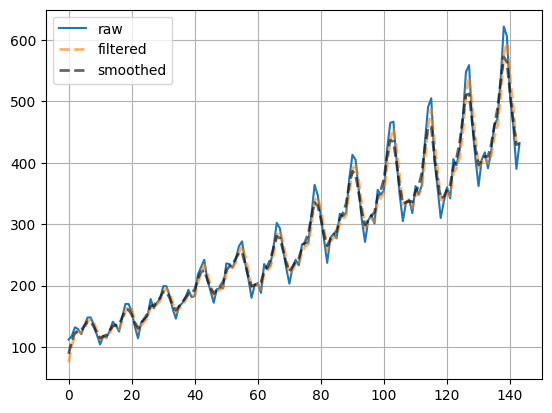

In [5]:
df.plot(label="raw")
plt.plot(np.concatenate([v["X"] for v in result]), label="filtered", linestyle='dashed', alpha=0.6, linewidth=2)
plt.plot(smoothed_result["X"], label="smoothed", linestyle='dashed', alpha=0.6, c="black", linewidth=2)
plt.legend()
plt.grid()